# Week 4 Final Assignment

### The Case:
You want to open a Chinese Restaurant in New York, Manhattan Area. You are already aware that there are lots of Chinese restaurants in New York, however, you believe that your restaurant has the potential to be very famous with its delicious food. To maximize the probability of success, you want to open your restaurant in the area with the least amount of Chinese restaurants. The goal is to find this area in New York.

In [19]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [36]:
CLIENT_ID = 'CVQXFW1S1Y40SBCZQYAXLNOYABUK5UFNLKMUEAKF0UGMR2C0' # your Foursquare ID
CLIENT_SECRET = 'ZUVOEIFOX4GXMFKKS2XXSVK1AUN2STUAGNX0JV0X2JXKTZYY' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CVQXFW1S1Y40SBCZQYAXLNOYABUK5UFNLKMUEAKF0UGMR2C0
CLIENT_SECRET:ZUVOEIFOX4GXMFKKS2XXSVK1AUN2STUAGNX0JV0X2JXKTZYY


In [37]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [38]:
search_query = 'Chinese Restaurant'
radius = 50000
print(search_query + ' .... OK!')

Chinese Restaurant .... OK!


In [39]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=CVQXFW1S1Y40SBCZQYAXLNOYABUK5UFNLKMUEAKF0UGMR2C0&client_secret=ZUVOEIFOX4GXMFKKS2XXSVK1AUN2STUAGNX0JV0X2JXKTZYY&ll=40.7127281,-74.0060152&oauth_token=&v=20180604&query=Chinese Restaurant&radius=50000&limit=500'

In [40]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60252d15bf8e526ca0572092'},
 'response': {'venues': [{'id': '58aa398b14fb41097a0cf923',
    'name': 'Great Fortune Chinese Restaurant 聚旺茶餐廳',
    'location': {'address': '5 Catherine St',
     'crossStreet': 'btwn E Broadway & Chatham Sq',
     'lat': 40.713875,
     'lng': -73.99728,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.713875,
       'lng': -73.99728}],
     'distance': 748,
     'postalCode': '10038',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['5 Catherine St (btwn E Broadway & Chatham Sq)',
      'New York, NY 10038',
      'United States']},
    'categories': [{'id': '52af3a7c3cf9994f4e043bed',
      'name': 'Cantonese Restaurant',
      'pluralName': 'Cantonese Restaurants',
      'shortName': 'Cantonese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'ref

In [41]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print(dataframe.shape)
dataframe.head()

(50, 25)


<ipython-input-41-c3e8e8a77818>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood,venuePage.id
0,58aa398b14fb41097a0cf923,Great Fortune Chinese Restaurant 聚旺茶餐廳,"[{'id': '52af3a7c3cf9994f4e043bed', 'name': 'C...",v-1613049109,False,5 Catherine St,btwn E Broadway & Chatham Sq,40.713875,-73.997280,"[{'label': 'display', 'lat': 40.713875, 'lng':...",748,10038,US,New York,NY,United States,[5 Catherine St (btwn E Broadway & Chatham Sq)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4e4463cf52b18fcc799a9761,88 Reach House chinese restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1613049109,False,88 Division St,Eldrige street,40.714468,-73.993727,"[{'label': 'display', 'lat': 40.714468, 'lng':...",1054,10002,US,New York,NY,United States,"[88 Division St (Eldrige street), New York, NY...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4d83993c81fdb1f7cf87eabf,Canal Best Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1613049109,False,266 Canal St,NaN,40.718790,-74.001055,"[{'label': 'display', 'lat': 40.71878993882605...",794,10013,US,New York,NY,United States,"[266 Canal St, New York, NY 10013, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,581299bb38fa2e54303f6891,Taste Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1613049109,False,178 Church St,NaN,40.715690,-74.007605,"[{'label': 'display', 'lat': 40.7156902, 'lng'...",355,10013,US,New York,NY,United States,"[178 Church St, New York, NY 10013, United Sta...",322507,https://www.seamless.com/menu/taste-chinese-re...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
4,4e4e4c7abd4101d0d7a72532,Dragon Gate Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1613049109,False,92 Elizabeth St,NaN,40.718358,-73.995632,"[{'label': 'display', 'lat': 40.718358, 'lng':...",1077,10013,US,New York,NY,United States,"[92 Elizabeth St, New York, NY 10013, United S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Great Fortune Chinese Restaurant 聚旺茶餐廳,Cantonese Restaurant,5 Catherine St,btwn E Broadway & Chatham Sq,40.713875,-73.997280,"[{'label': 'display', 'lat': 40.713875, 'lng':...",748,10038,US,New York,NY,United States,[5 Catherine St (btwn E Broadway & Chatham Sq)...,NaN,58aa398b14fb41097a0cf923
1,88 Reach House chinese restaurant,Chinese Restaurant,88 Division St,Eldrige street,40.714468,-73.993727,"[{'label': 'display', 'lat': 40.714468, 'lng':...",1054,10002,US,New York,NY,United States,"[88 Division St (Eldrige street), New York, NY...",NaN,4e4463cf52b18fcc799a9761
2,Canal Best Chinese Restaurant,Chinese Restaurant,266 Canal St,NaN,40.718790,-74.001055,"[{'label': 'display', 'lat': 40.71878993882605...",794,10013,US,New York,NY,United States,"[266 Canal St, New York, NY 10013, United States]",NaN,4d83993c81fdb1f7cf87eabf
3,Taste Chinese Restaurant,Chinese Restaurant,178 Church St,NaN,40.715690,-74.007605,"[{'label': 'display', 'lat': 40.7156902, 'lng'...",355,10013,US,New York,NY,United States,"[178 Church St, New York, NY 10013, United Sta...",NaN,581299bb38fa2e54303f6891
4,Dragon Gate Chinese Restaurant,Chinese Restaurant,92 Elizabeth St,NaN,40.718358,-73.995632,"[{'label': 'display', 'lat': 40.718358, 'lng':...",1077,10013,US,New York,NY,United States,"[92 Elizabeth St, New York, NY 10013, United S...",NaN,4e4e4c7abd4101d0d7a72532
5,Downtown Chinese Restaurant,Food,135 John St,NaN,40.707134,-74.004944,"[{'label': 'entrance', 'lat': 40.707098, 'lng'...",629,10038,US,New York,NY,United States,"[135 John St, New York, NY 10038, United States]",NaN,4f320f6d19833175d60c8d97
6,Ann's Chinese Restaurant,Asian Restaurant,1 E Broadway #2FL,NaN,40.713154,-73.997955,"[{'label': 'display', 'lat': 40.71315383911133...",681,10038,US,New York,NY,United States,"[1 E Broadway #2FL, New York, NY 10038, United...",NaN,5012c0fde4b0748a78b0c886
7,Malasia-Thai-Chinese Restaurant,Asian Restaurant,NaN,NaN,40.717035,-73.999719,"[{'label': 'display', 'lat': 40.717035, 'lng':...",715,10013,US,New York,NY,United States,"[New York, NY 10013, United States]",NaN,50b043dbe4b0be4ddec7cf6a
8,Marco Polo Chinese Restaurant,Chinese Restaurant,94 Baxter St,NaN,40.716920,-73.999419,"[{'label': 'display', 'lat': 40.71692037258939...",726,10013,US,New York,NY,United States,"[94 Baxter St, New York, NY 10013, United States]",NaN,4e4e4c65bd4101d0d7a723cb
9,Fu Zhou An Ping Chinese Restaurant,Asian Restaurant,20 Henry St,NaN,40.712723,-73.996880,"[{'label': 'display', 'lat': 40.71272277832031...",770,10002,US,New York,NY,United States,"[20 Henry St, New York, NY 10002, United States]",NaN,58913f12288b6a0e789bb237


In [64]:
df = dataframe_filtered[['lat','lng']]
df.head()

,lat,lng
0,40.713875,-73.997280
1,40.714468,-73.993727
2,40.718790,-74.001055
3,40.715690,-74.007605
4,40.718358,-73.995632


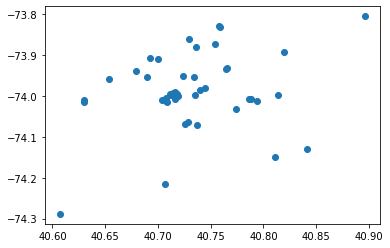

In [66]:
plt.scatter(df['lat'],df['lng'])

In [69]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(df)

KMeans(n_clusters=4, n_init=12)

In [70]:
k_means_labels = k_means.labels_

In [71]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 40.70684402, -73.99084831],
       [ 40.78007018, -74.05384253],
       [ 40.76122014, -73.87762859],
       [ 40.65694811, -74.25253687]])

In [45]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
venues_map

## Conclusion:

As we see from the map, no Chinese Restaurants exist in uptown Manhattan, so it would be wise to open a restaurant there